In [6]:
#libraries
# Data
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Graphs
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesing & modelling 
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [7]:
# import data
# ==============================================================================
data = pd.read_csv("wine.csv")
data = data.drop('class', axis=1)
print(data.head(1))
print('')
print('Mean:')
print(data.mean(axis=0))
print('')
print('Variance:')
print(data.var(axis=0))

   Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    14.23        1.71  2.43               15.6        127            2.8   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   

   OD280/OD315 of diluted wines  Proline  
0                          3.92     1065  

Mean:
Alcohol                          13.000618
Malic acid                        2.336348
Ash                               2.366517
Alcalinity of ash                19.494944
Magnesium                        99.741573
Total phenols                     2.295112
Flavanoids                        2.029270
Nonflavanoid phenols              0.361854
Proanthocyanins                   1.590899
Color intensity                   5.058090
Hue                               0.957449
OD280/OD315 of diluted wines      2.611685
Proline                         746.893258
dtype: float64

Variance:
Alcohol 

In [8]:
#PCA training
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(data)

# Se extrae el modelo entrenado del pipeline
model_pca = pca_pipe.named_steps['pca']



# array to dataframe to add names.
dat=pd.DataFrame(
    data    = model_pca.components_,
    columns = data.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13']
)

print(dat)

       Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
PC1   0.144329   -0.245188 -0.002051          -0.239320   0.141992   
PC2  -0.483652   -0.224931 -0.316069           0.010591  -0.299634   
PC3  -0.207383    0.089013  0.626224           0.612080   0.130757   
PC4  -0.017856    0.536890 -0.214176           0.060859  -0.351797   
PC5  -0.265664    0.035214 -0.143025           0.066103   0.727049   
PC6  -0.213539   -0.536814 -0.154475           0.100825  -0.038144   
PC7  -0.056396    0.420524 -0.149171          -0.286969   0.322883   
PC8  -0.396139   -0.065827  0.170260          -0.427970   0.156361   
PC9   0.508619   -0.075283 -0.307694           0.200449   0.271403   
PC10  0.211605   -0.309080 -0.027125           0.052799   0.067870   
PC11 -0.225917    0.076486 -0.498691           0.479314   0.071289   
PC12 -0.266286    0.121696 -0.049622          -0.055743   0.062220   
PC13  0.014970    0.025964 -0.141218           0.091683   0.056774   

      Total phenols

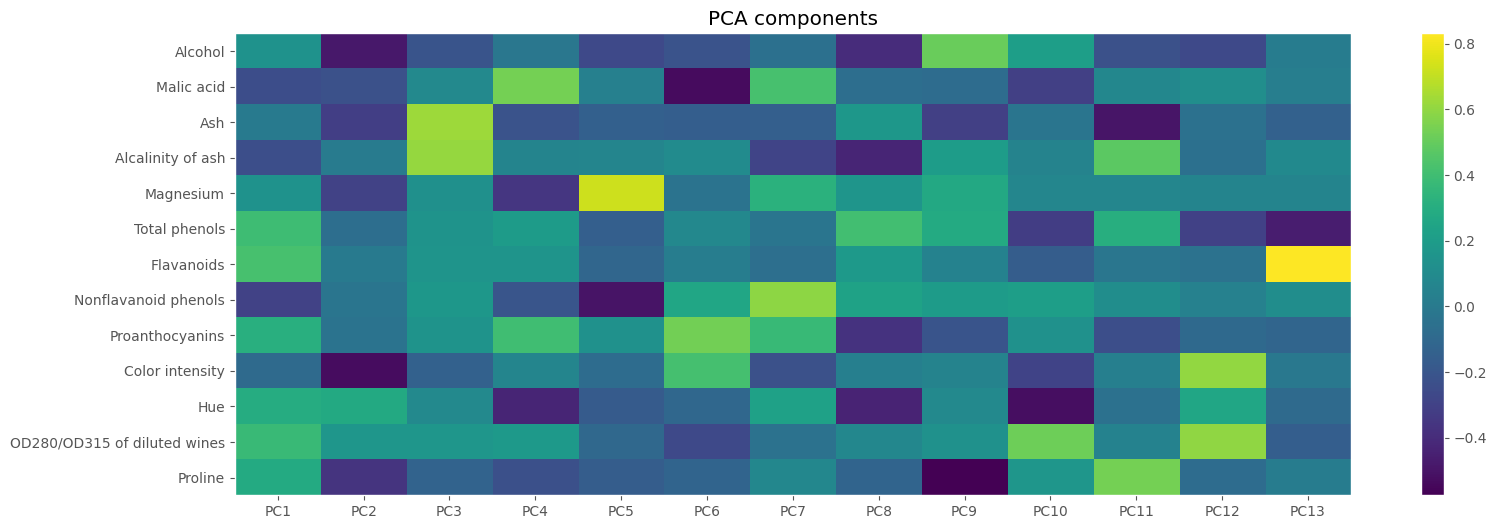

In [9]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 6))
components = model_pca.components_
plt.imshow(components.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(data.columns)), data.columns)
#plt.xticks(range(len(data.columns)), np.arange(model_pca.n_components_) + 1)
plt.xticks(range(len(data.columns)), dat.index)
plt.grid(False)
plt.colorbar();
plt.title("PCA components")
#~ fig = sns_plot.get_figure()
fig.savefig("output_pca.png")


[0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


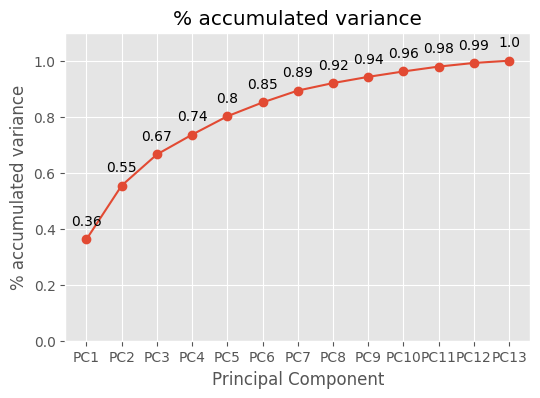

In [10]:
# % accumulated variance
# ==============================================================================
prop_variance_acum = model_pca.explained_variance_ratio_.cumsum()
print(prop_variance_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(data.columns)) + 1,
    prop_variance_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(data.columns)) + 1, prop_variance_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(model_pca.n_components_) + 1)
ax.set_xticklabels(dat.index)
ax.set_title('% accumulated variance')
ax.set_xlabel('Principal Component')
ax.set_ylabel('% accumulated variance');

fig.savefig("output_pca1.png")